In [1]:
from pandas import read_csv
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scripts.dataset_analyse import elbow_chart, number_clusters, biplot, boxplot, silhouette_plot


In [2]:
dataframe_reduced = read_csv('../data/cluster/marketing_campaign_principal_component.csv')
dataframe = read_csv('../data/cleaned/marketing_campaign_reduction_drop_columns.csv')

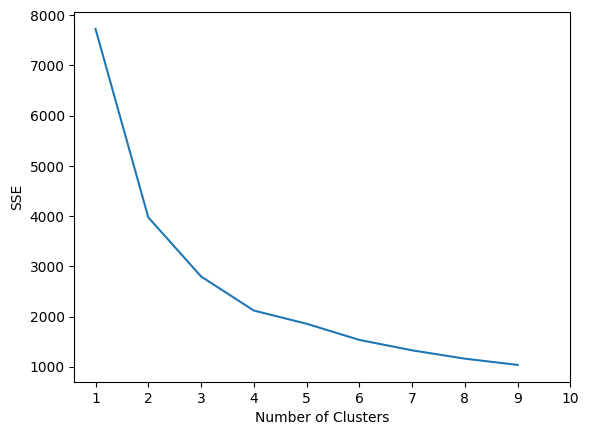

In [3]:
elbow_chart(dataframe_reduced)

In [4]:
number_clusters(dataframe_reduced)

2  : Silhouette score is: 0.3782218159337323 

3  : Silhouette score is: 0.35594862272217936 

4  : Silhouette score is: 0.3690087256866022 

5  : Silhouette score is: 0.3683537041789976 

6  : Silhouette score is: 0.30553088538636125 

All Scores : {2: 0.3782218159337323, 3: 0.35594862272217936, 4: 0.3690087256866022, 5: 0.3683537041789976, 6: 0.30553088538636125}


For n_clusters = 4 The average silhouette_score is : 0.3843924889866191


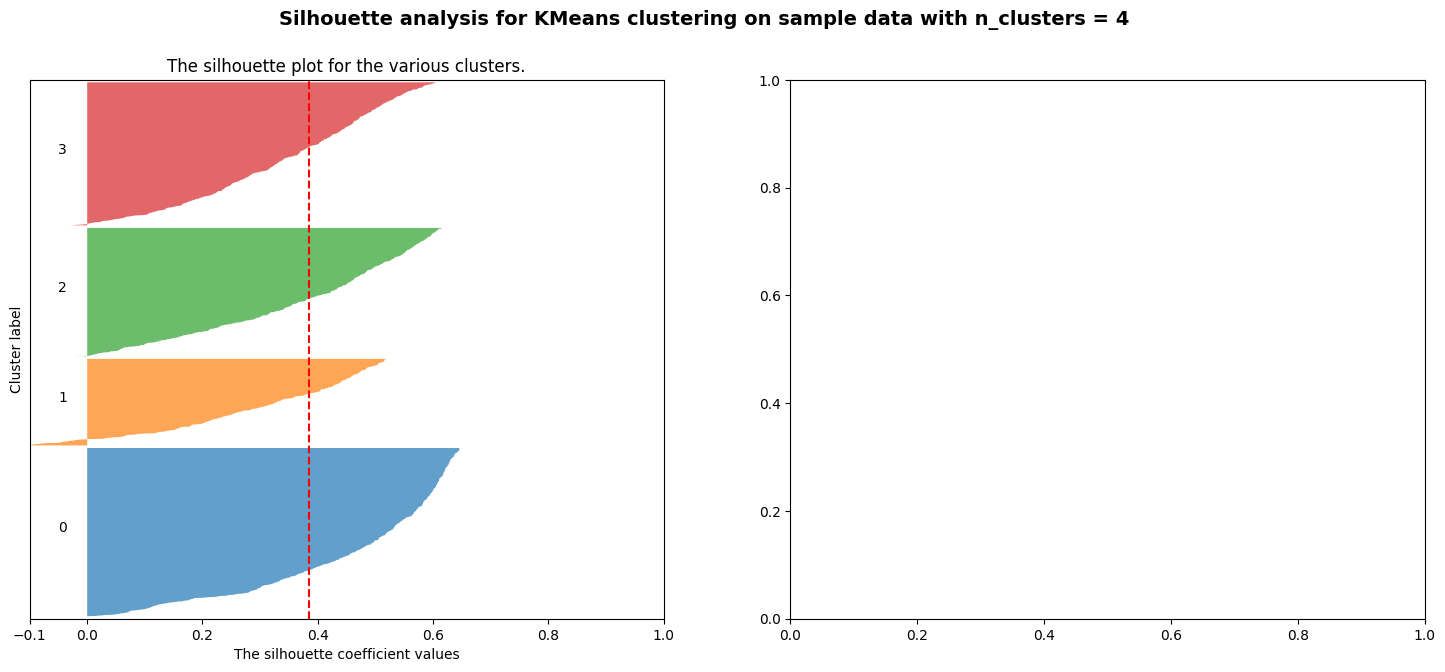

In [5]:
silhouette_plot(dataframe_reduced, 4)

# Clusters
Thanks to the elbow chart & the silhouette scores, we can analyse the best clusters number.  
Firstly we can remove the idea of 4 or more clusters, the scores are worst each time.  
We can think between 2 or 3 clusters. 2 has a better silhouette score but 3 seems to be the elbow in the elbow chart with a good silhouette score.  
We finally chose **3** clusters

***

# Algorythms
To clusterize and then profilize customers profiles, we can apply some clusters algorythms.  
### Kmeans 
***

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='principal_component_1', ylabel='principal_component_2'>

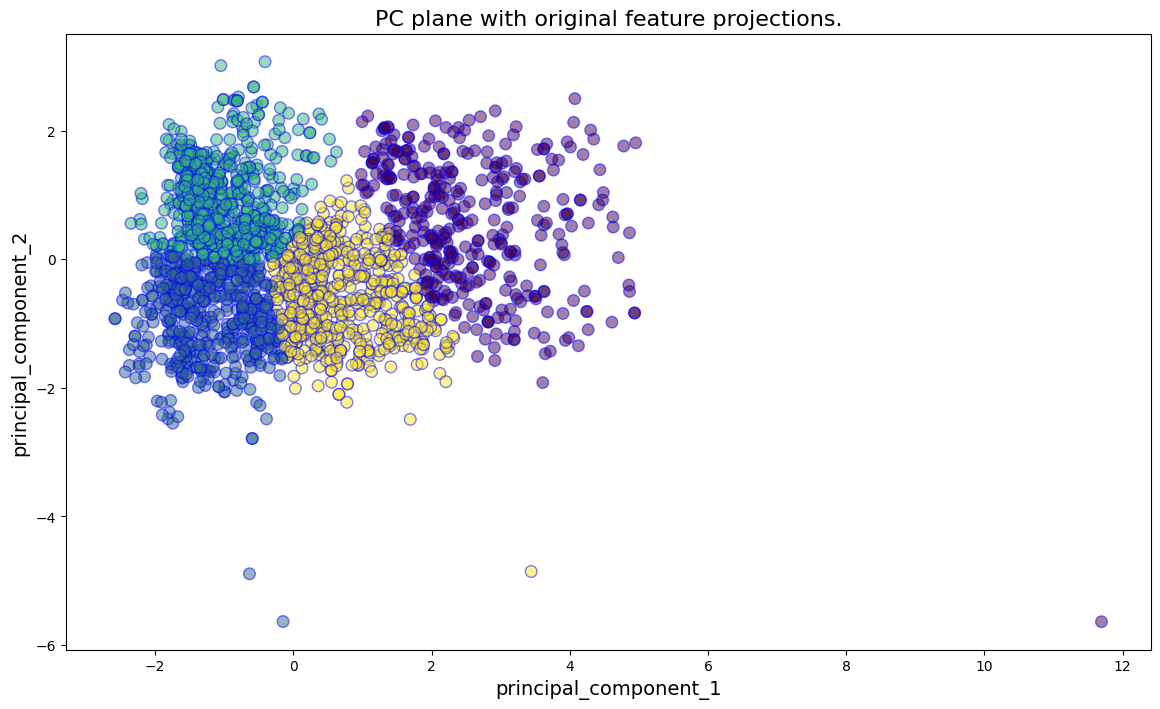

In [6]:

kmean = KMeans(n_clusters=4)
clusters_predicted = kmean.fit_predict(dataframe_reduced)
dataframe_reduced['Clusters'] = clusters_predicted
dataframe['Clusters'] = clusters_predicted

biplot(dataframe_reduced, cluster_column='Clusters')

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='principal_component_1', ylabel='principal_component_2'>

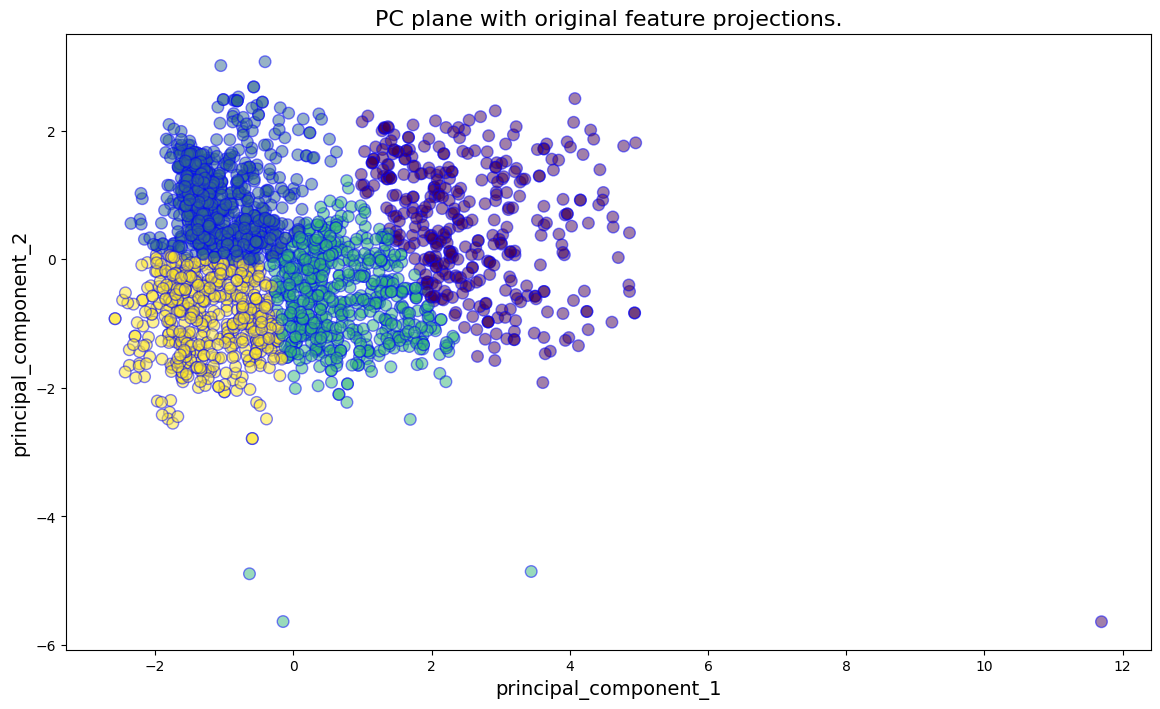

In [7]:
agglo_cluster = AgglomerativeClustering(n_clusters=4)
clusters_predicted = agglo_cluster.fit_predict(dataframe_reduced)
dataframe_reduced['Clusters'] = clusters_predicted
dataframe['Clusters'] = clusters_predicted

biplot(dataframe_reduced, cluster_column='Clusters')

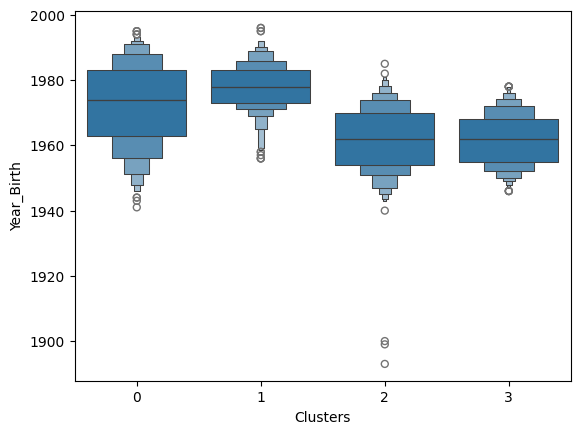

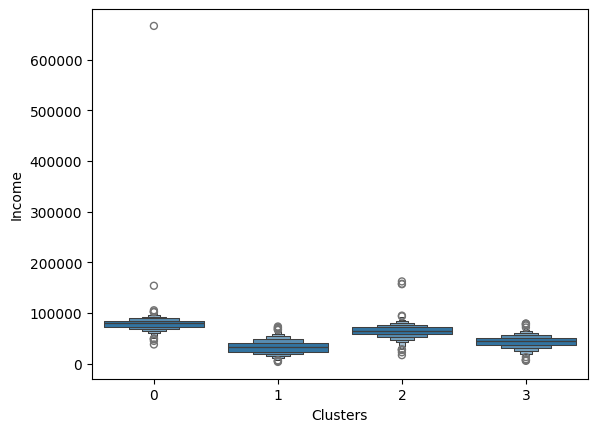

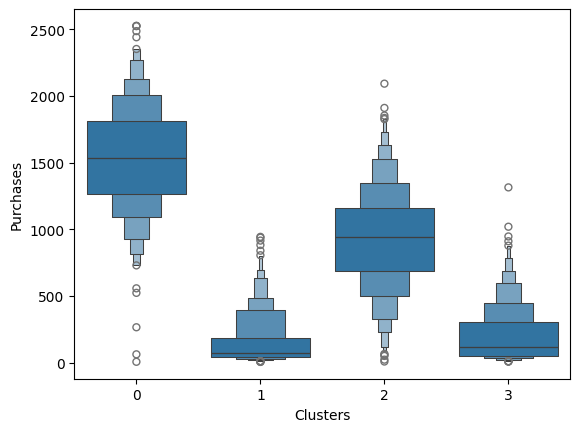

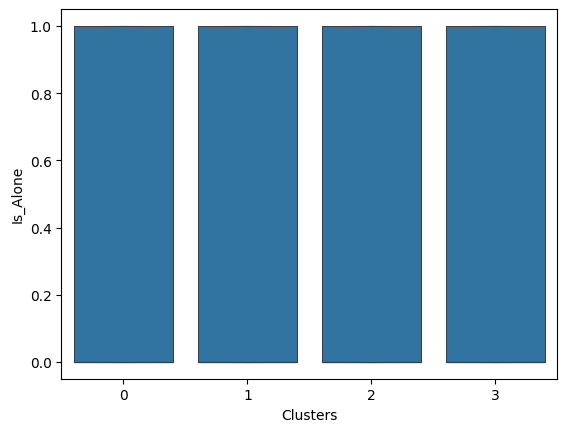

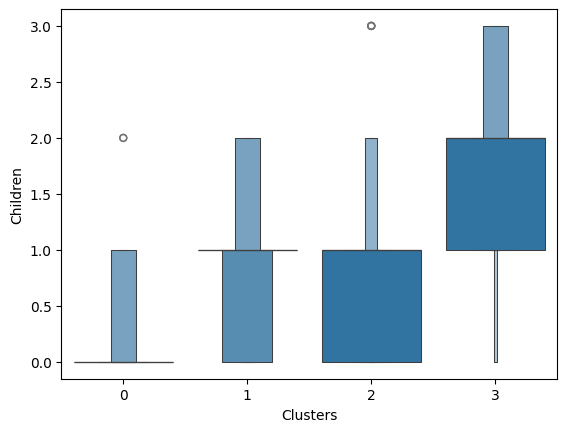

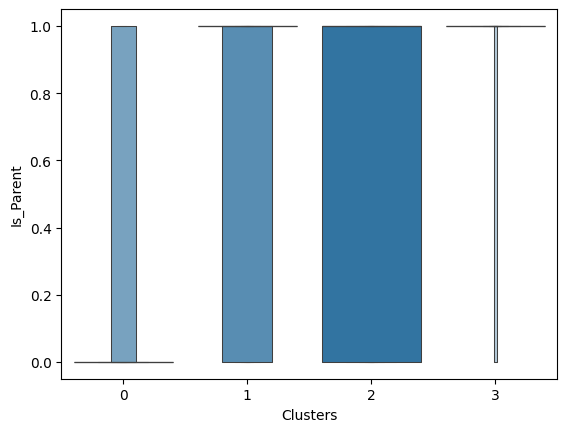

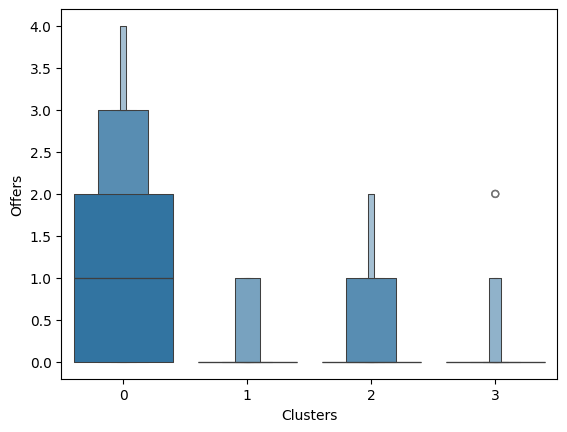

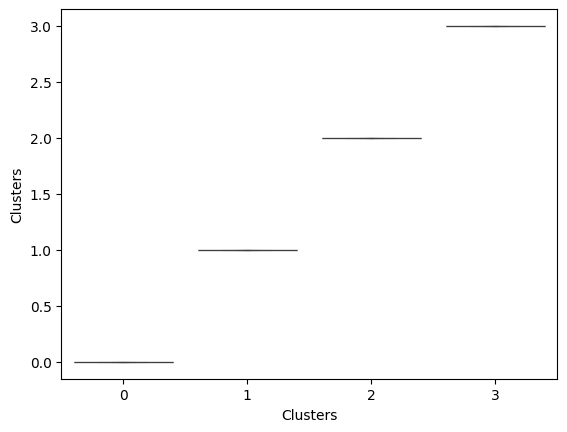

In [8]:
boxplot(dataframe, 'Clusters')

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='principal_component_1', ylabel='principal_component_2'>

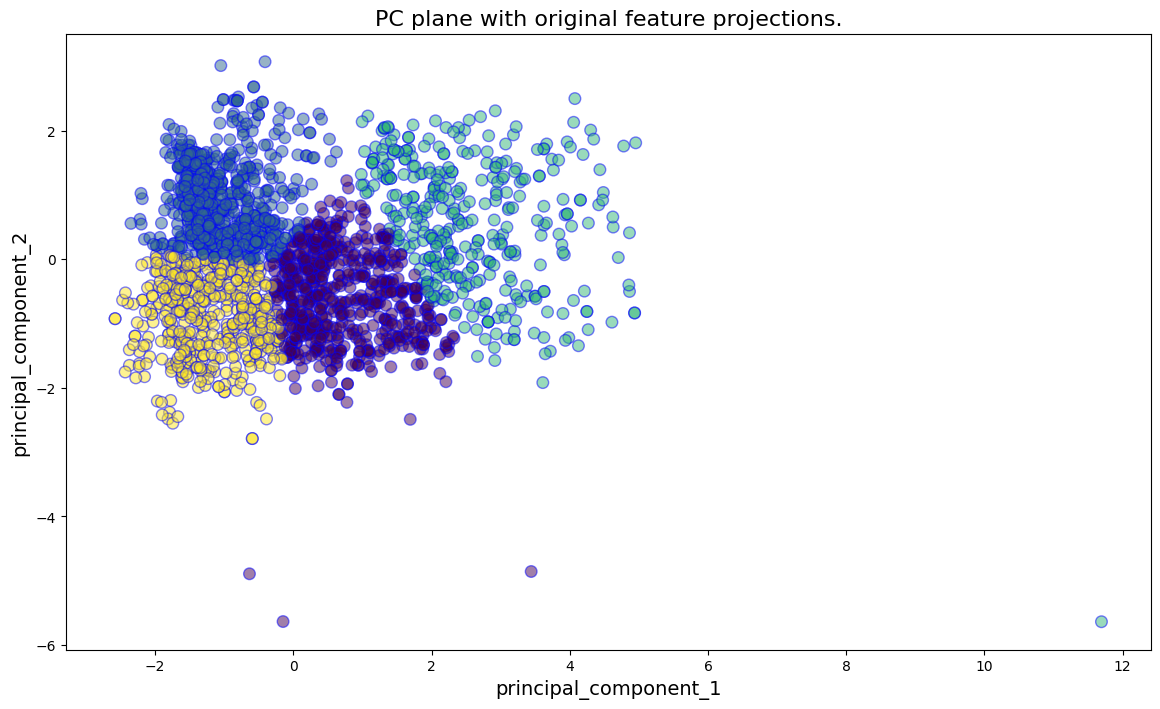

In [9]:
gaussian = GaussianMixture(n_components=4)
clusters_predicted = gaussian.fit_predict(dataframe_reduced)
dataframe_reduced['Clusters'] = clusters_predicted
dataframe['Clusters'] = clusters_predicted

biplot(dataframe_reduced, cluster_column='Clusters')

# Profiling 
Thanks to the 3 clusters, we can establish 3 profiles thant can describe the client base.  
*** 
### Young active customers
Generally alone or a couple without children, the young active customers are the most likely to purchases and uses offers. Thanks to their good income, they are the most active customers.  
***
### The small family
The young family are great customers. With 0 or 1, they are active in purchasing and looking for offers. They have a good income than enable them to purchases.
***
### The old inactive family
Family of 3 or 4 with generally old parents, they are among the worst customers. Not really interested in the offers, with a median wages, and do not purchases a lot.  
We can try to have them more interested with better and specific offers.  
***
### The small and young family
The small and young family are also among the customers. They generally have 1 unique child, and the parents are really young. Their small wages cannot afford the purchases that are really low, even if they are a little looking for offers.